In [18]:
import os
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [35]:
with open(r"C:\Users\HP\Desktop\CARAIOLocal\prototype_fin\magic-tool-prototype\app\test_karyo.pkl","rb") as f:
    out=pickle.load(f)

In [38]:
################ The issue lies in the server we are padding the image too much
def crop_output(out):
    for i in out.keys():
        h,w,_=out[i].shape
        off=int(h*0.2)
        end=off*4
        img=out[i][off:end,off:end]
        if np.mean(img) == 255:
            raise Exception('ALL WHITE IMAGE CROP GONE WRONG!')
        plt.imshow(img)
        plt.show()

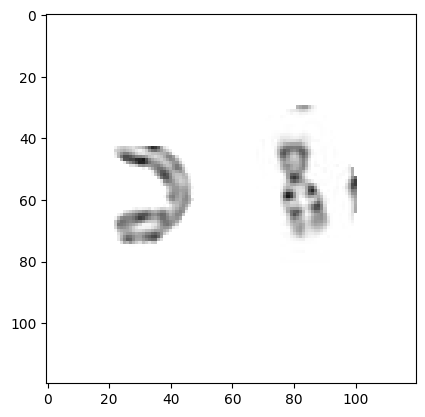

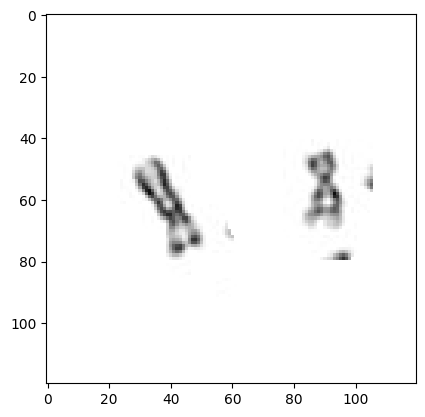

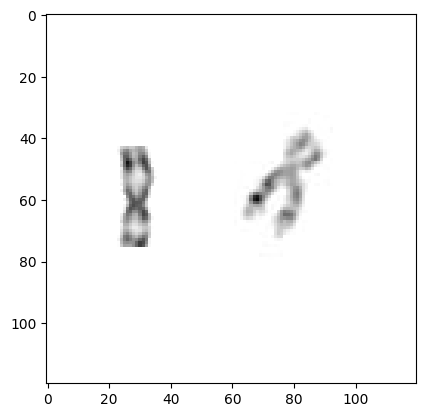

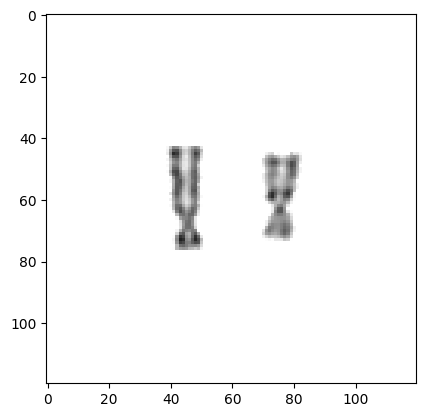

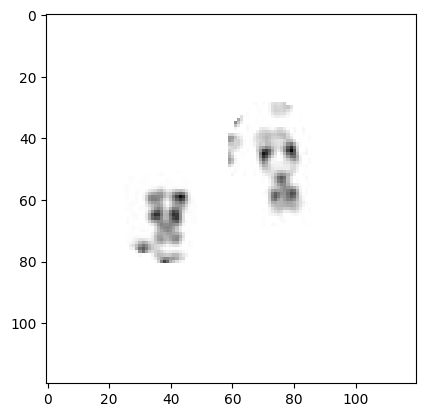

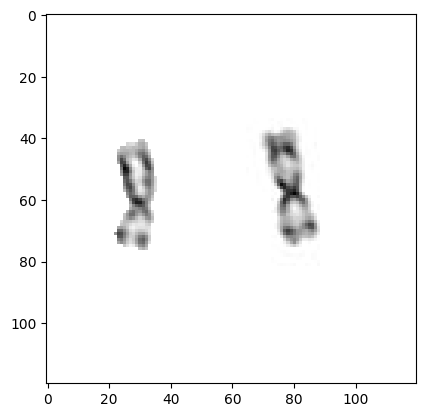

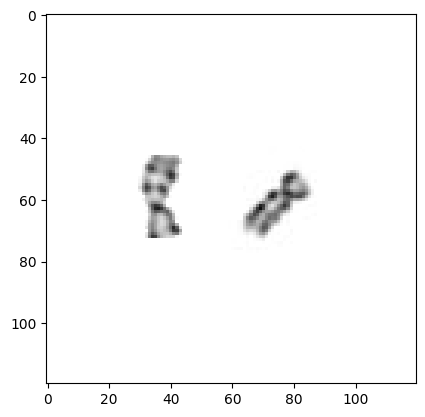

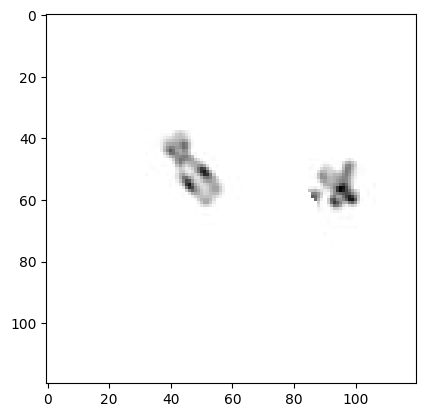

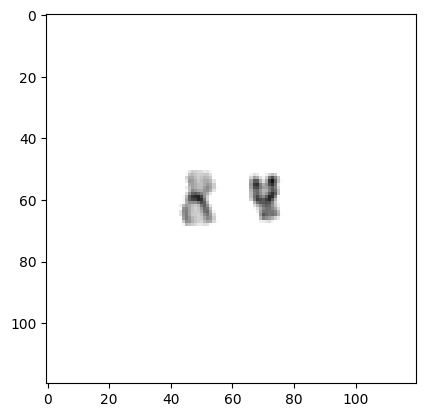

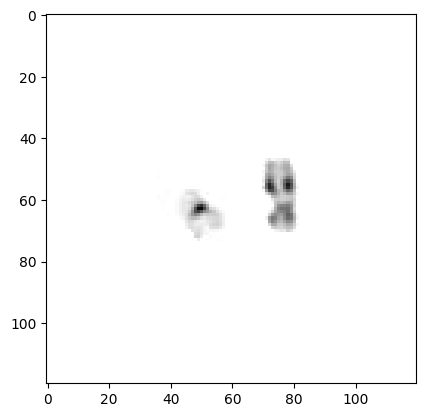

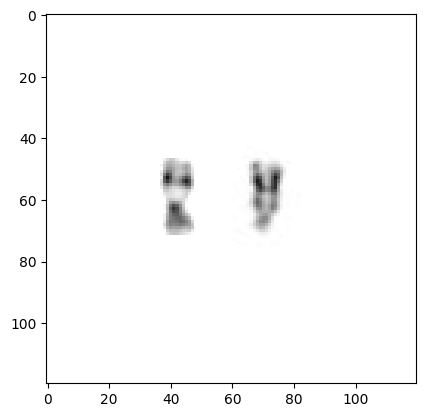

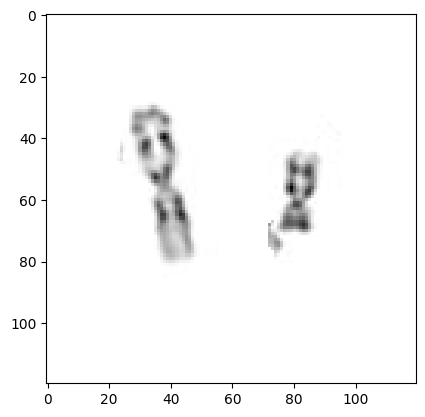

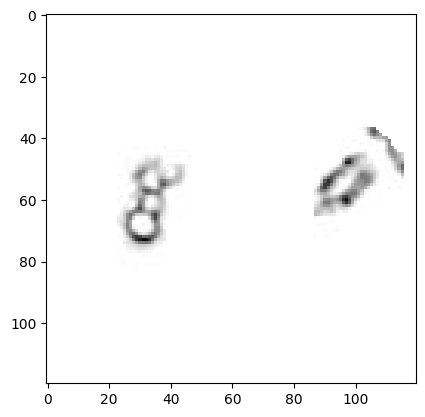

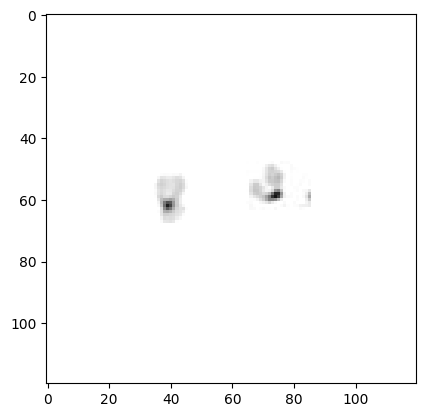

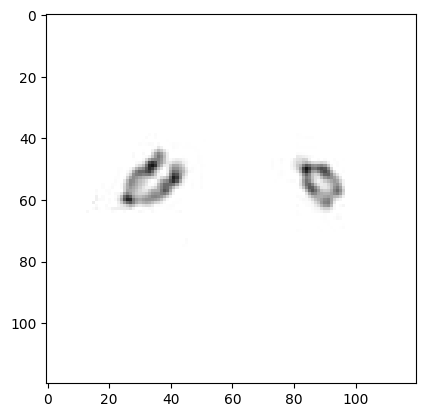

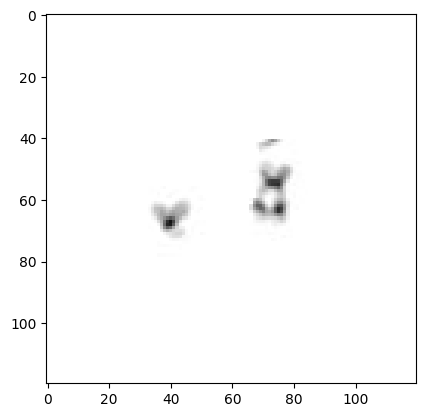

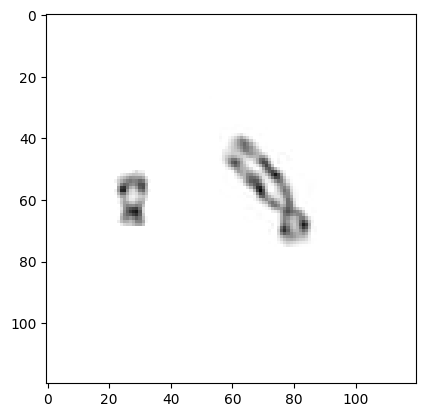

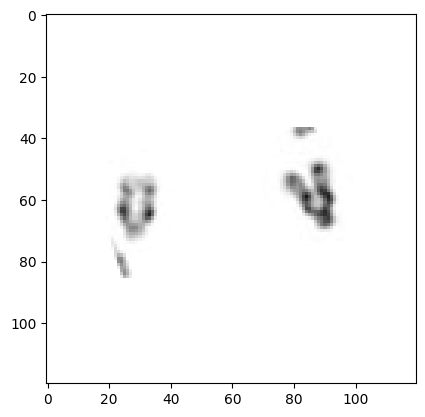

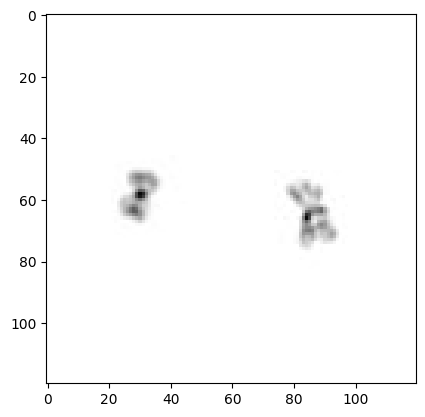

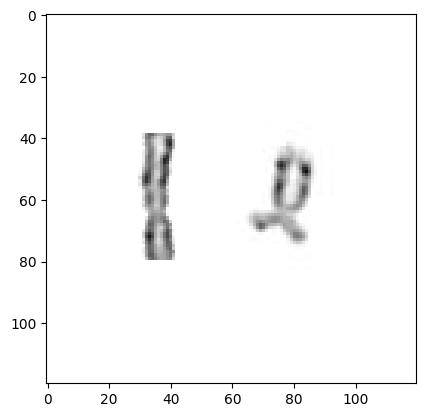

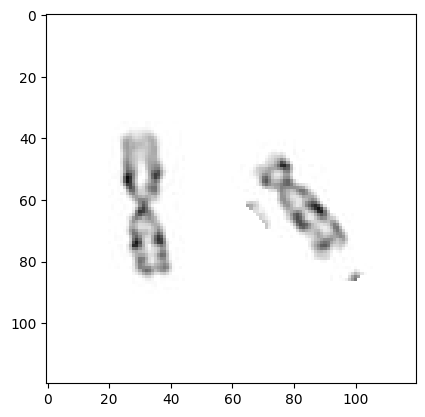

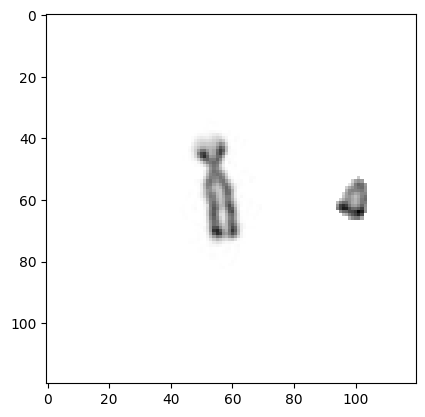

Exception: ALL WHITE IMAGE CROP GONE WRONG!

In [39]:
################### Fixing it for the application now 
crop_output(out)

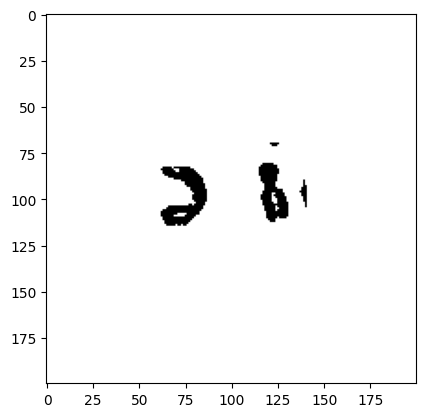

In [62]:
img=out[1].astype(np.uint8)
img_g=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_g, 220, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(thresh,cmap="gray")

8

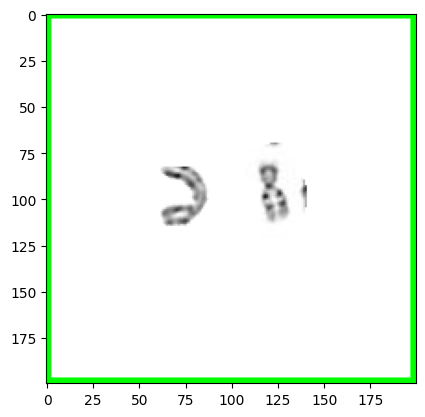

In [63]:
cv2.drawContours(img, contours, 0, (0, 255, 0), 3)
plt.imshow(img)